# Plotting a solar cycle index

- https://docs.sunpy.org/en/stable/generated/gallery/plotting/solar_cycle_example.html

This example demonstrates how to plot the solar cycle in terms of
the number of sunspots and a prediction for the next few years.

In [ ]:
import matplotlib.pyplot as plt

import astropy.units as u
from astropy.time import Time, TimeDelta
from astropy.visualization import time_support

import sunpy.timeseries as ts
from sunpy.net import Fido
from sunpy.net import attrs as a
from sunpy.time import TimeRange

The U.S. Dept. of Commerce, NOAA, Space Weather Prediction Center (SWPC)
provides recent solar cycle indices which includes different sunspot numbers,
radio flux, and geomagnetic index. They also provide predictions for how the
sunspot number and radio flux will evolve. Predicted values are based on the
consensus of the Solar Cycle 24 Prediction Panel.

We will first search for and then download the data.

In [ ]:
time_range = TimeRange("2008-06-01 00:00", Time.now())
result = Fido.search(a.Time(time_range), a.Instrument('noaa-indices'))
f_noaa_indices = Fido.fetch(result)
result = Fido.search(a.Time(time_range.end, time_range.end + TimeDelta(4 * u.year)),
                     a.Instrument('noaa-predict'))
f_noaa_predict = Fido.fetch(result)

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

observed-solar-cycle-indices.json: 0.00B [00:00, ?B/s]

C:\Users\usr\miniconda3\envs\cal\Lib\site-packages\erfa\core.py:133: ErfaWarning: ERFA function "taiutc" yielded 1 of "dubious year (Note 4)"
  warn(f'ERFA function "{func_name}" yielded {wmsg}', ErfaWarning)
C:\Users\usr\miniconda3\envs\cal\Lib\site-packages\erfa\core.py:133: ErfaWarning: ERFA function "d2dtf" yielded 1 of "dubious year (Note 5)"
  warn(f'ERFA function "{func_name}" yielded {wmsg}', ErfaWarning)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

predicted-solar-cycle.json: 0.00B [00:00, ?B/s]

In [ ]:
f_noaa_indices

<parfive.results.Results object>
['C:\\Users\\usr\\sunpy\\data\\observed-solar-cycle-indices.json']

In [ ]:
f_noaa_predict

<parfive.results.Results object>
['C:\\Users\\usr\\sunpy\\data\\predicted-solar-cycle.json']

We then load them into individual `sunpy.timeseries.TimeSeries` objects.

In [ ]:
noaa = ts.TimeSeries(f_noaa_indices, source='noaaindices').truncate(time_range)
noaa_predict = ts.TimeSeries(f_noaa_predict, source='noaapredictindices')

C:\Users\usr\miniconda3\envs\cal\Lib\site-packages\erfa\core.py:133: ErfaWarning: ERFA function "dtf2d" yielded 1 of "dubious year (Note 6)"
  warn(f'ERFA function "{func_name}" yielded {wmsg}', ErfaWarning)
C:\Users\usr\miniconda3\envs\cal\Lib\site-packages\erfa\core.py:133: ErfaWarning: ERFA function "dtf2d" yielded 1 of "dubious year (Note 6)"
  warn(f'ERFA function "{func_name}" yielded {wmsg}', ErfaWarning)


<sunpy.timeseries.sources.noaa.NOAAIndicesTimeSeries object>
SunPy TimeSeries
----------------
Observatory:			Unknown
Instrument:			<a href=https://www.swpc.noaa.gov/products/solar-cycle-progression target="_blank">Unknown</a>
Channel(s):			sunspot RI<br>sunspot RI smooth<br>sunspot SWO<br>sunspot SWO smooth<br>radio flux<br>radio flux smooth
Start Date:			2008-06-01 00:00:00
End Date:			2024-11-01 00:00:00
Center Date:			2016-08-16 11:59:59
Resolution:			2616872.747 s
Samples per Channel:		198
Data Range(s):		sunspot RI           2.16E+02<br>sunspot RI smooth    1.47E+02<br>sunspot SWO          2.03E+02<br>sunspot SWO smooth   1.42E+02<br>radio flux           1.80E+02<br>radio flux smooth    1.17E+02
Units:			dimensionless<br>W / (Hz m2)
            sunspot RI  sunspot RI smooth  sunspot SWO  sunspot SWO smooth  \
2008-06-01         5.2                4.8         4.27                 5.3   
2008-07-01         0.6                4.0         1.10                 4.6   
2008-08-01         0.3                3.8         0.00                 4.4   
2008-09-01         1.2                3.2         1.53                 3.8   
2008-10-01         4.2                2.4         5.23                 3.0   
...                ...                ...          ...                 ...   
2024-07-01       196.5                NaN       190.29                 NaN   
2024-08-01       215.5                NaN       203.10                 NaN   
2024-09-01       141.4                NaN       147.97                 NaN   
2024-10-01       166.4                NaN       159.45                 NaN   
2024-11-01       152.5                NaN       144.97                 NaN   

            radio flux  radio flux smooth  
2008-06-01       65.85               69.3  
2008-07-01       65.67               68.8  
2008-08-01       66.17               68.6  
2008-09-01       67.00               68.3  
2008-10-01       68.21               68.2  
...                ...                ...  
2024-07-01      198.63                NaN  
2024-08-01      245.60                NaN  
2024-09-01      196.71                NaN  
2024-10-01      222.62                NaN  
2024-11-01      199.95                NaN  

[198 rows x 6 columns]
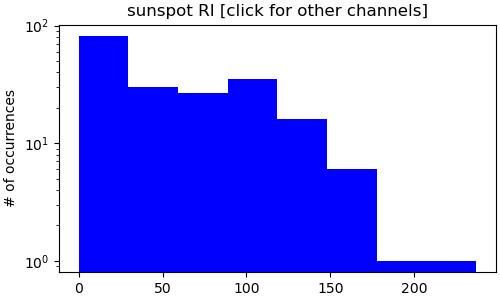
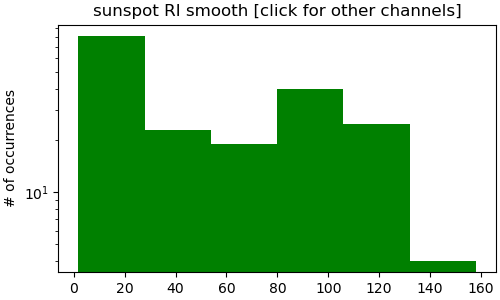
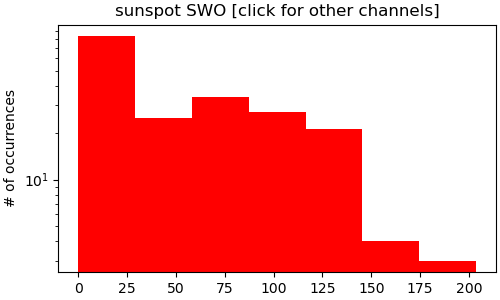
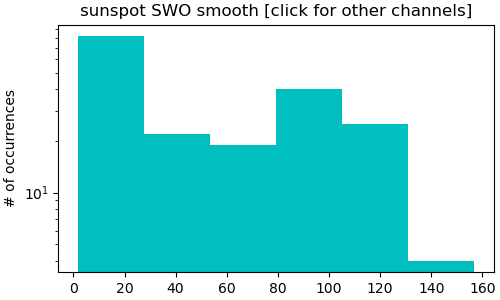
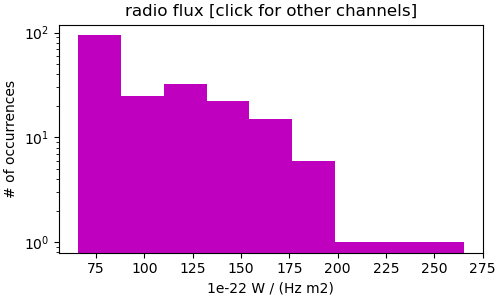
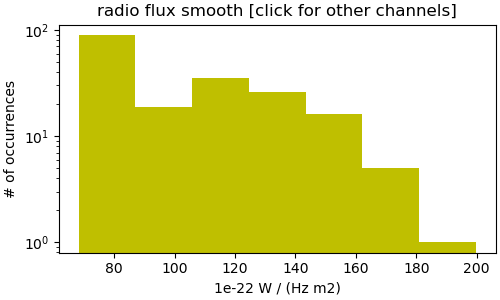
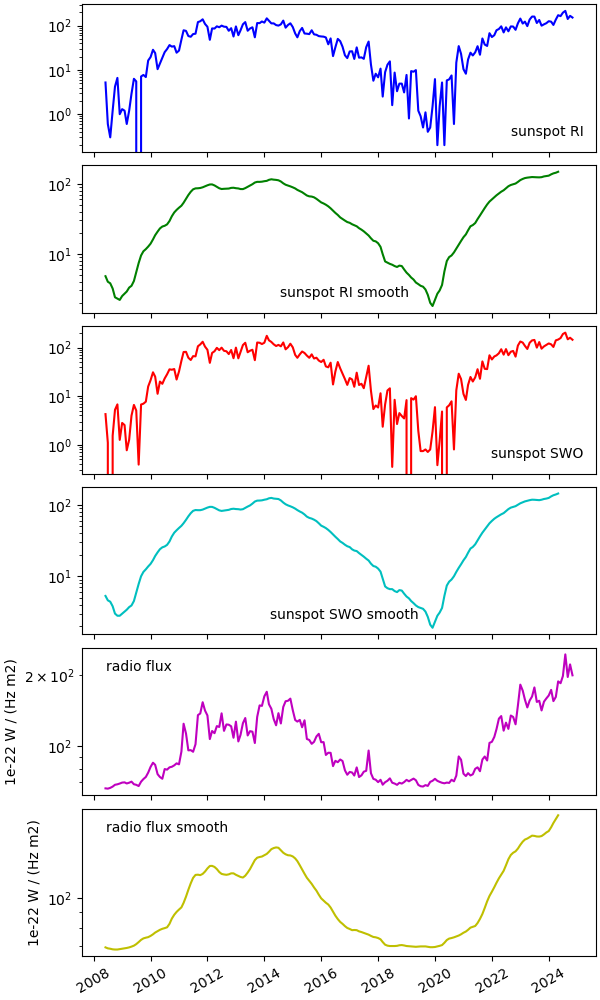
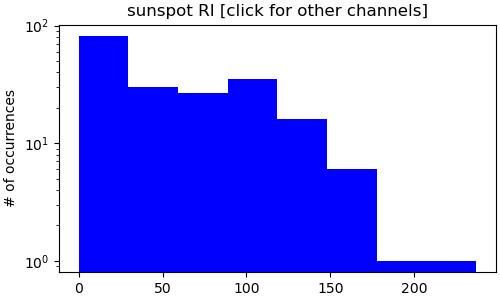

In [ ]:
noaa

C:\Users\usr\miniconda3\envs\cal\Lib\site-packages\erfa\core.py:133: ErfaWarning: ERFA function "dtf2d" yielded 1 of "dubious year (Note 6)"
  warn(f'ERFA function "{func_name}" yielded {wmsg}', ErfaWarning)
C:\Users\usr\miniconda3\envs\cal\Lib\site-packages\erfa\core.py:133: ErfaWarning: ERFA function "utctai" yielded 1 of "dubious year (Note 3)"
  warn(f'ERFA function "{func_name}" yielded {wmsg}', ErfaWarning)
C:\Users\usr\miniconda3\envs\cal\Lib\site-packages\erfa\core.py:133: ErfaWarning: ERFA function "taiutc" yielded 1 of "dubious year (Note 4)"
  warn(f'ERFA function "{func_name}" yielded {wmsg}', ErfaWarning)
C:\Users\usr\miniconda3\envs\cal\Lib\site-packages\erfa\core.py:133: ErfaWarning: ERFA function "d2dtf" yielded 1 of "dubious year (Note 5)"
  warn(f'ERFA function "{func_name}" yielded {wmsg}', ErfaWarning)
C:\Users\usr\miniconda3\envs\cal\Lib\site-packages\erfa\core.py:133: ErfaWarning: ERFA function "dtf2d" yielded 1 of "dubious year (Note 6)"
  warn(f'ERFA function "{

<sunpy.timeseries.sources.noaa.NOAAPredictIndicesTimeSeries object>
SunPy TimeSeries
----------------
Observatory:			Unknown
Instrument:			<a href=https://www.swpc.noaa.gov/products/solar-cycle-progression target="_blank">Unknown</a>
Channel(s):			sunspot<br>sunspot high<br>sunspot low<br>radio flux<br>radio flux high<br>radio flux low
Start Date:			2024-06-01 00:00:00
End Date:			2040-12-01 00:00:00
Center Date:			2032-08-31 12:00:00
Resolution:			2616747.739 s
Samples per Channel:		199
Data Range(s):		sunspot           1.51E+02<br>sunspot high      1.46E+02<br>sunspot low       1.50E+02<br>radio flux        1.19E+02<br>radio flux high   1.80E+02<br>radio flux low    1.18E+02
Units:			dimensionless<br>W / (Hz m2)
            sunspot  sunspot high  sunspot low  radio flux  radio flux high  \
2024-06-01    151.0         152.0        150.0      186.50            187.5   
2024-07-01    150.4         152.4        148.4      184.20            185.2   
2024-08-01    149.5         152.5        146.5      181.40            183.4   
2024-09-01    149.5         154.5        144.5      178.90            181.9   
2024-10-01    149.0         154.0        144.0      177.00            181.0   
...             ...           ...          ...         ...              ...   
2040-08-01      0.0           9.0          0.0       67.73              8.0   
2040-09-01      0.0           9.0          0.0       67.73              8.0   
2040-10-01      0.0           9.0          0.0       67.73              8.0   
2040-11-01      0.0           9.0          0.0       67.73              8.0   
2040-12-01      0.0           9.0          0.0       67.73              8.0   

            radio flux low  
2024-06-01           185.5  
2024-07-01           183.2  
2024-08-01           179.4  
2024-09-01           175.9  
2024-10-01           173.0  
...                    ...  
2040-08-01            67.7  
2040-09-01            67.7  
2040-10-01            67.7  
2040-11-01            67.7  
2040-12-01            67.7  

[199 rows x 6 columns]
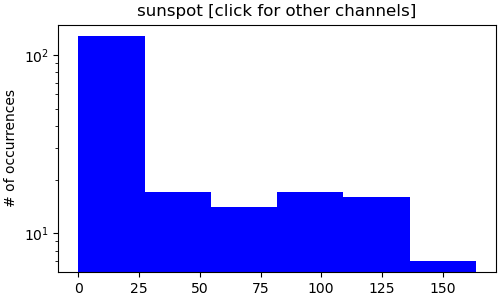
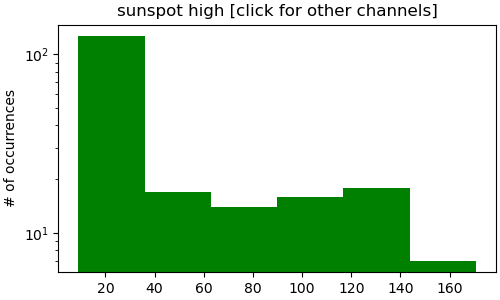
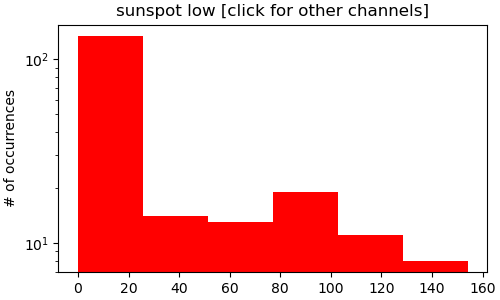
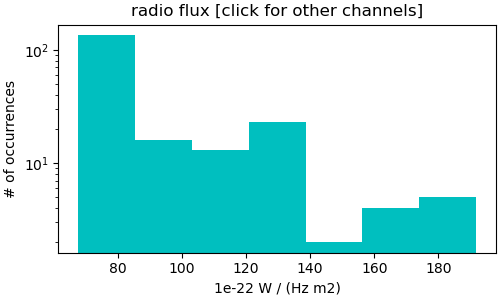
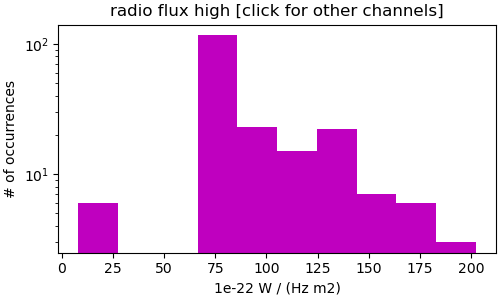
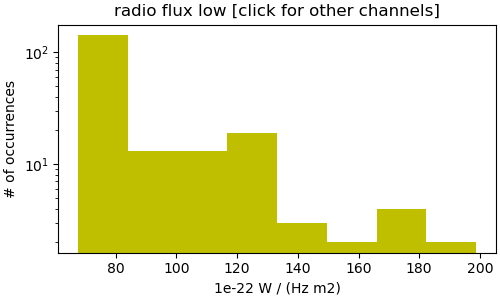
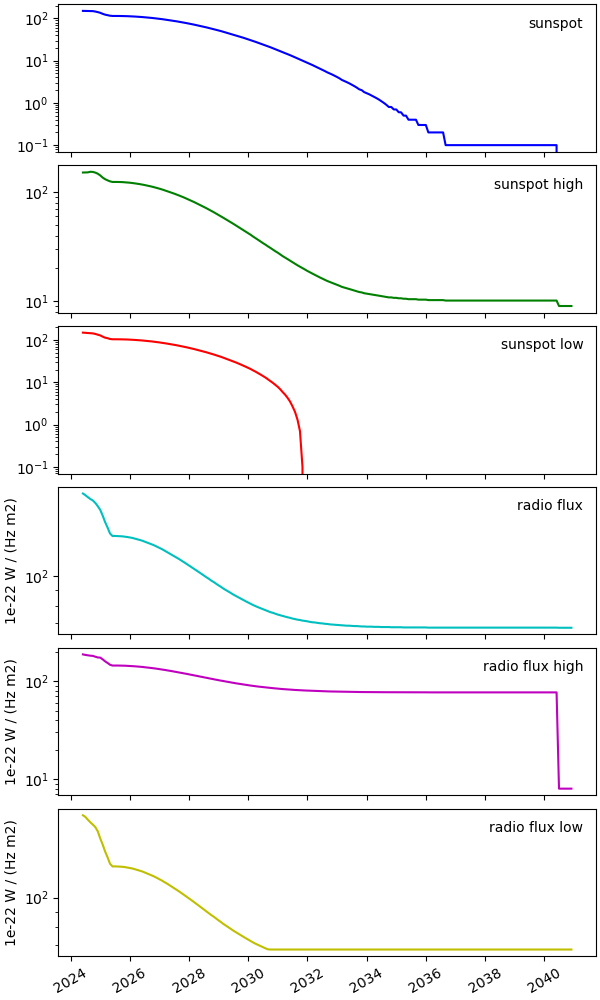
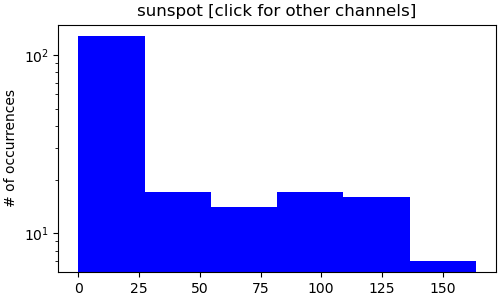

In [ ]:
noaa_predict

Finally, we plot both ``noaa`` and ``noaa_predict`` for the sunspot number.
In this case we use the S.I.D.C. Brussels International Sunspot Number (RI).
The predictions provide both a high and low values, which we plot below as
ranges.

C:\Users\usr\miniconda3\envs\cal\Lib\site-packages\erfa\core.py:133: ErfaWarning: ERFA function "dtf2d" yielded 144 of "dubious year (Note 6)"
  warn(f'ERFA function "{func_name}" yielded {wmsg}', ErfaWarning)
C:\Users\usr\miniconda3\envs\cal\Lib\site-packages\erfa\core.py:133: ErfaWarning: ERFA function "d2dtf" yielded 1 of "dubious year (Note 5)"
  warn(f'ERFA function "{func_name}" yielded {wmsg}', ErfaWarning)
C:\Users\usr\miniconda3\envs\cal\Lib\site-packages\erfa\core.py:133: ErfaWarning: ERFA function "dtf2d" yielded 2 of "dubious year (Note 6)"
  warn(f'ERFA function "{func_name}" yielded {wmsg}', ErfaWarning)
C:\Users\usr\miniconda3\envs\cal\Lib\site-packages\erfa\core.py:133: ErfaWarning: ERFA function "d2dtf" yielded 2 of "dubious year (Note 5)"
  warn(f'ERFA function "{func_name}" yielded {wmsg}', ErfaWarning)


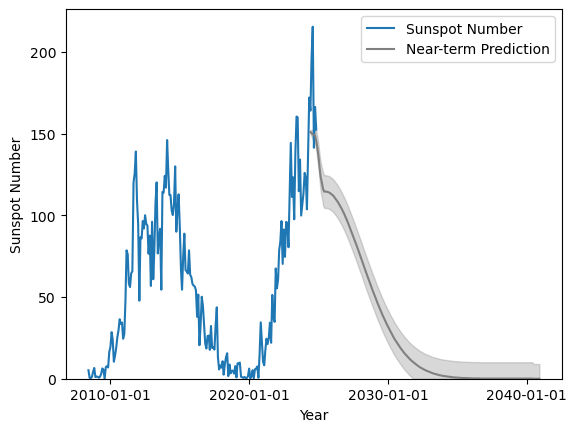

In [ ]:
time_support()
fig, ax = plt.subplots()
ax.plot(noaa.time, noaa.quantity('sunspot RI'), label='Sunspot Number')
ax.plot(
    noaa_predict.time, noaa_predict.quantity('sunspot'),
    color='grey', label='Near-term Prediction'
)
ax.fill_between(
    noaa_predict.time, noaa_predict.quantity('sunspot low'),
    noaa_predict.quantity('sunspot high'), alpha=0.3, color='grey'
)
ax.set_ylim(bottom=0)
ax.set_ylabel('Sunspot Number')
ax.set_xlabel('Year')
ax.legend()

plt.show()